In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist #datasets
from tensorflow.keras.models import Sequential #quickway to assemble the neural network
from tensorflow.keras.layers import Dense,Dropout #add some new things to NN to prevent overfitting
from tensorflow.keras.optimizers import RMSprop #Optimizer

In [2]:
#loading data
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

In [3]:
#converting data to keras format
train_images=mnist_train_images.reshape(60000,784) 
test_images=mnist_test_images.reshape(10000,784)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
#normalizing
train_images /=255
test_images /=255

In [4]:
#converting to one_hot format
train_labels=keras.utils.to_categorical(mnist_train_labels,10)
test_labels=keras.utils.to_categorical(mnist_test_labels,10)

 0  1  2  3  4  5  6  7  8  9
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


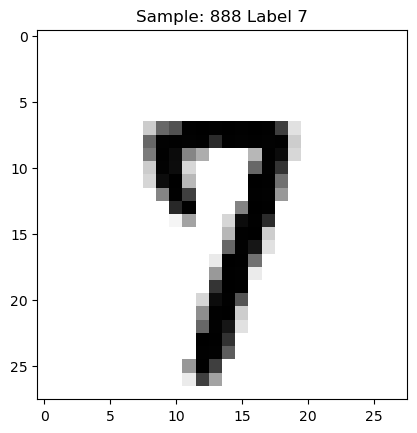

In [5]:
#lets take a peak at one of training images just to make sure it looks Ok

import matplotlib.pyplot as plt

def display_sample(num):
    print(" 0  1  2  3  4  5  6  7  8  9")
    #print the one-hot array of this sample's label
    print(train_labels[num])
    #print the label converted back to a number
    label=train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image=train_images[num].reshape([28,28])
    plt.title('Sample: %d Label %d' %(num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))

display_sample(888)

In [6]:
#setting the neural networks
model=Sequential() # a sequential medel
model.add(Dense(512,activation='relu',input_shape=(784,))) # 512 neurons with 784 inputs with relu activation code
model.add(Dense(10,activation='softmax')) # softmax activaiton with one_hot enocding

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
#setting up our optimizer and loss function and measurin accuracy

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
#running NN
history=model.fit(train_images, #input features
                  train_labels, 
                  batch_size=400, #100 batch size
                  epochs=10, #running 10 times
                  verbose=2,
                  validation_data=(test_images,test_labels))

Epoch 1/10
150/150 - 4s - loss: 0.3616 - accuracy: 0.8970 - val_loss: 0.2089 - val_accuracy: 0.9370 - 4s/epoch - 25ms/step
Epoch 2/10
150/150 - 1s - loss: 0.1552 - accuracy: 0.9556 - val_loss: 0.1237 - val_accuracy: 0.9650 - 923ms/epoch - 6ms/step
Epoch 3/10
150/150 - 1s - loss: 0.1024 - accuracy: 0.9711 - val_loss: 0.1076 - val_accuracy: 0.9668 - 887ms/epoch - 6ms/step
Epoch 4/10
150/150 - 1s - loss: 0.0758 - accuracy: 0.9785 - val_loss: 0.0830 - val_accuracy: 0.9755 - 924ms/epoch - 6ms/step
Epoch 5/10
150/150 - 1s - loss: 0.0593 - accuracy: 0.9826 - val_loss: 0.0766 - val_accuracy: 0.9768 - 1s/epoch - 7ms/step
Epoch 6/10
150/150 - 1s - loss: 0.0461 - accuracy: 0.9865 - val_loss: 0.0678 - val_accuracy: 0.9791 - 1s/epoch - 7ms/step
Epoch 7/10
150/150 - 1s - loss: 0.0372 - accuracy: 0.9894 - val_loss: 0.0654 - val_accuracy: 0.9797 - 1s/epoch - 7ms/step
Epoch 8/10
150/150 - 1s - loss: 0.0292 - accuracy: 0.9918 - val_loss: 0.0669 - val_accuracy: 0.9790 - 1s/epoch - 7ms/step
Epoch 9/10
150

In [11]:
#with only 10 models we have outperformed tensorflow

score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss: ',score[0])
print('Test Accuracy: ',score[1])

Test loss:  0.06326436251401901
Test Accuracy:  0.9800999760627747


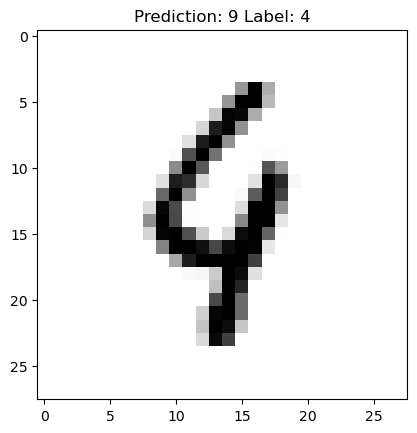

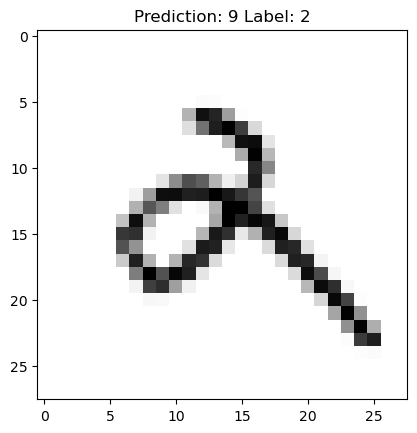

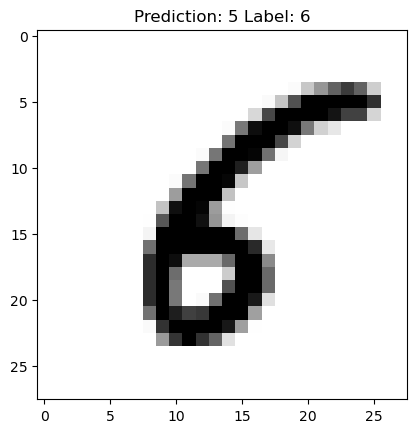

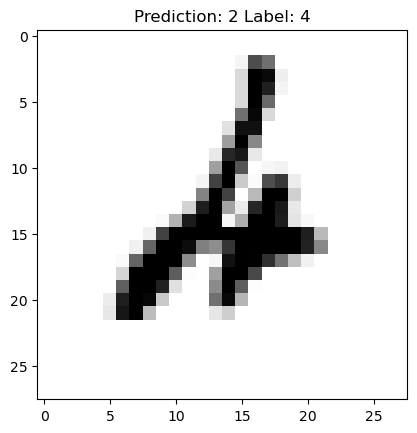

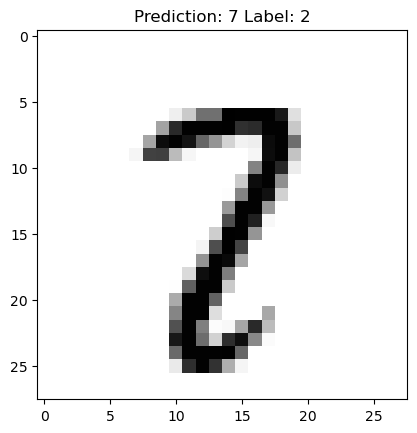

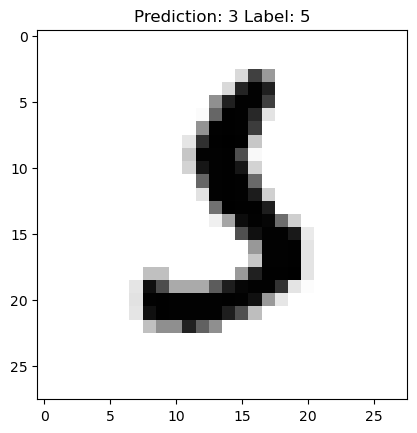

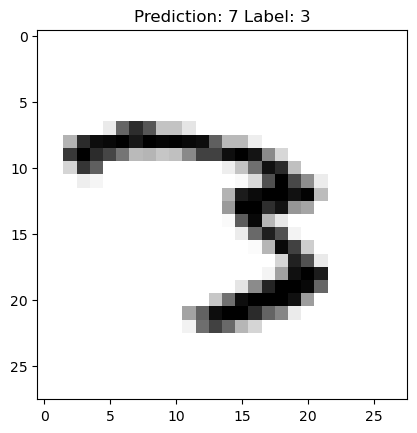

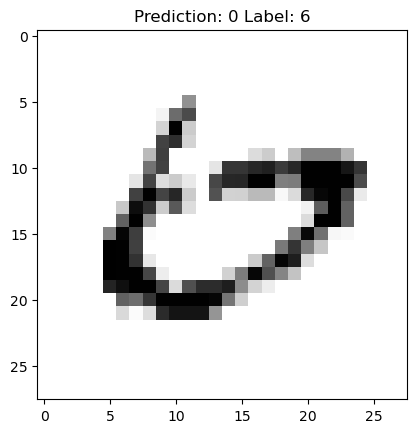

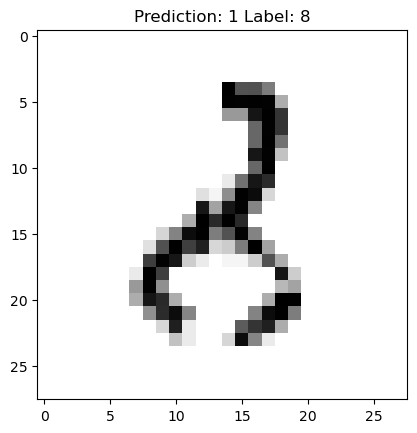

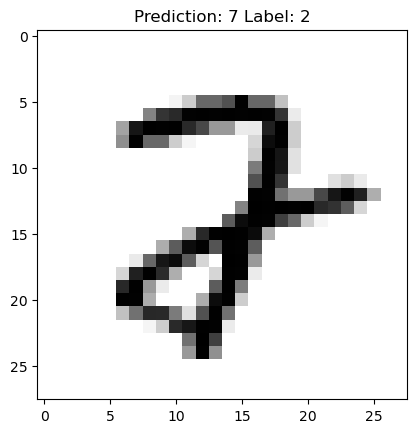

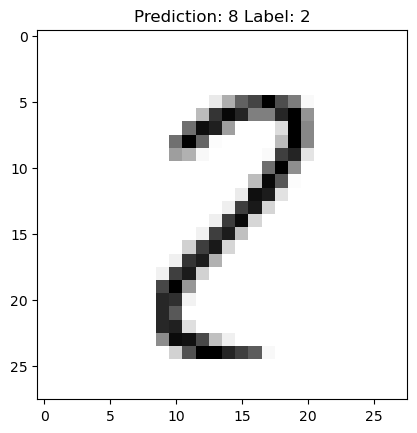

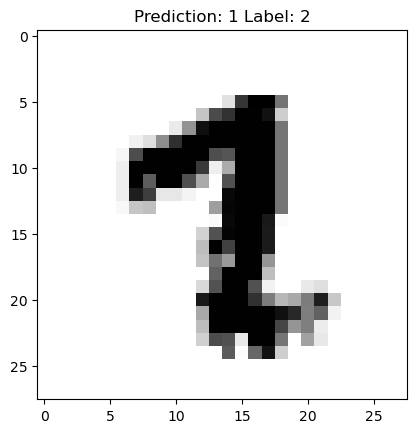

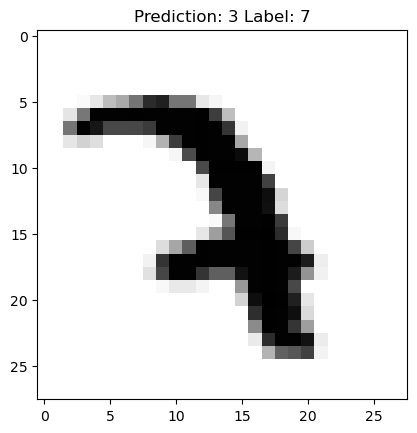

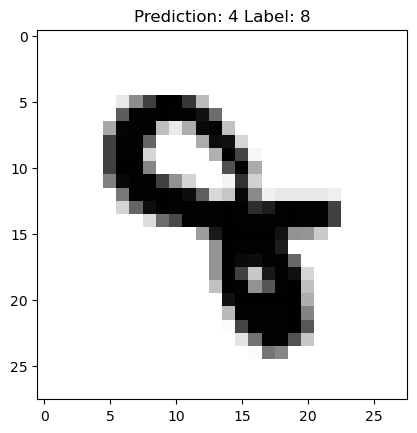

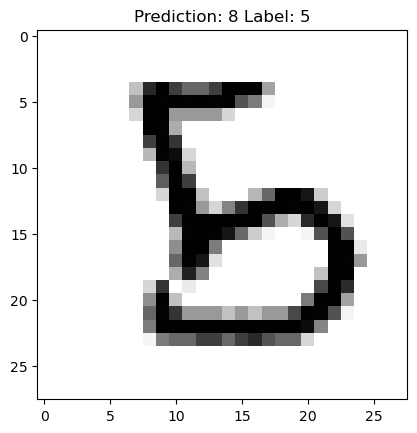

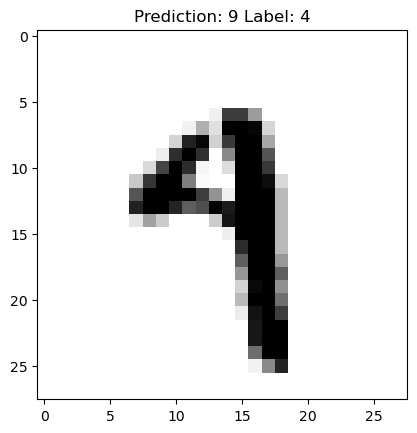

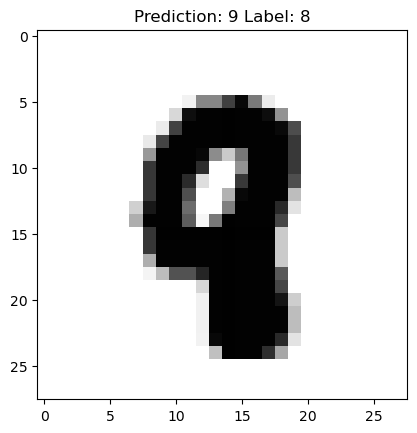

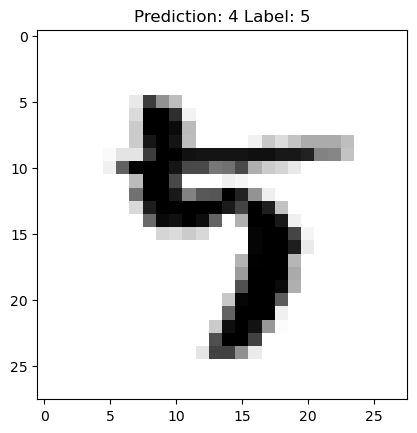

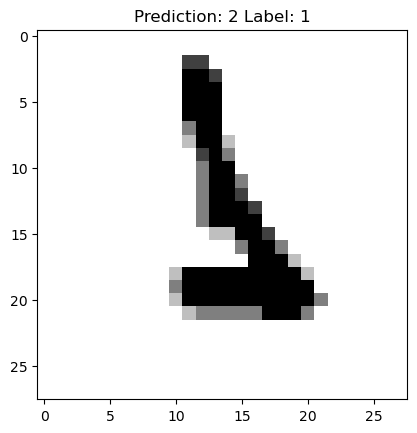

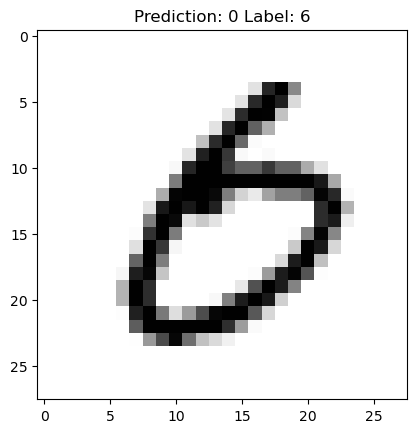

In [12]:
#lets visualize where our NN had challenges and gone wrong
for x in range(1000):
    test_image=test_images[x,:].reshape(1,784)
    predicted_cat=model.predict(test_image,verbose=0).argmax()
    label=test_labels[x].argmax()
    if(predicted_cat != label):
        plt.title('Prediction: %d Label: %d' %(predicted_cat,label))
        plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()

In [13]:
#running NN with different epochs
history=model.fit(train_images, #input features
                  train_labels, 
                  batch_size=693, #100 batch size
                  epochs=69, #running 10 times
                  verbose=2,
                  validation_data=(test_images,test_labels))

Epoch 1/69
87/87 - 1s - loss: 0.0139 - accuracy: 0.9968 - val_loss: 0.0587 - val_accuracy: 0.9822 - 1s/epoch - 15ms/step
Epoch 2/69
87/87 - 1s - loss: 0.0116 - accuracy: 0.9975 - val_loss: 0.0628 - val_accuracy: 0.9817 - 750ms/epoch - 9ms/step
Epoch 3/69
87/87 - 1s - loss: 0.0093 - accuracy: 0.9984 - val_loss: 0.0695 - val_accuracy: 0.9788 - 680ms/epoch - 8ms/step
Epoch 4/69
87/87 - 1s - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0647 - val_accuracy: 0.9811 - 711ms/epoch - 8ms/step
Epoch 5/69
87/87 - 1s - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0624 - val_accuracy: 0.9817 - 818ms/epoch - 9ms/step
Epoch 6/69
87/87 - 1s - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0658 - val_accuracy: 0.9811 - 782ms/epoch - 9ms/step
Epoch 7/69
87/87 - 1s - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0678 - val_accuracy: 0.9817 - 816ms/epoch - 9ms/step
Epoch 8/69
87/87 - 1s - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.0646 - val_accuracy: 0.9820 - 789ms/epoch - 9ms/step
Epoch 9/69
87/87 -

In [20]:
#with only 10 models we have outperformed tensorflow

score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss: ',score[0])
print('Test Accuracy: ',score[1])

Test loss:  0.12081949412822723
Test Accuracy:  0.9839000105857849


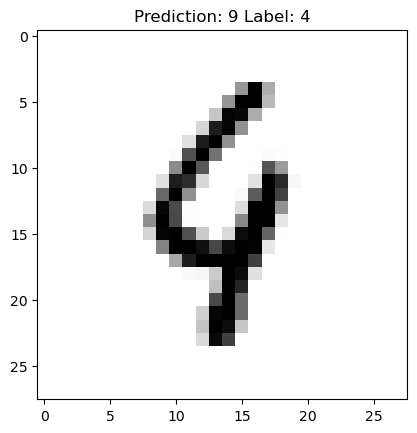

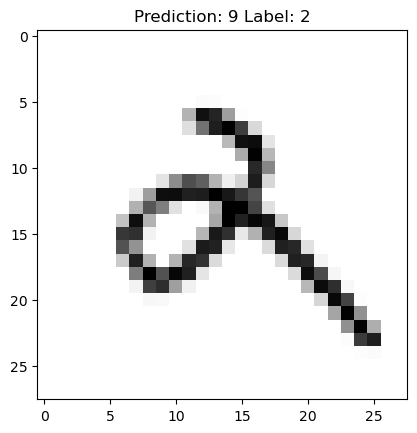

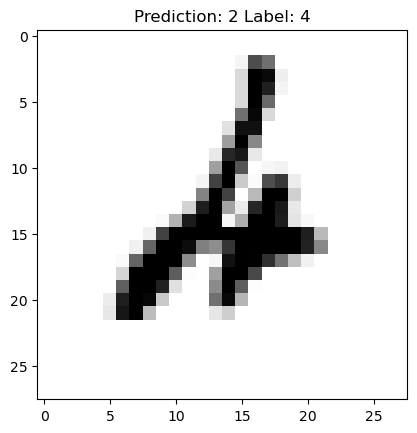

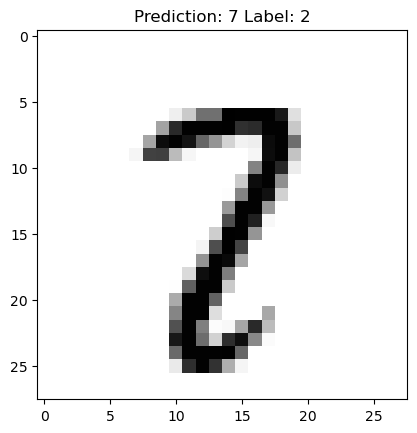

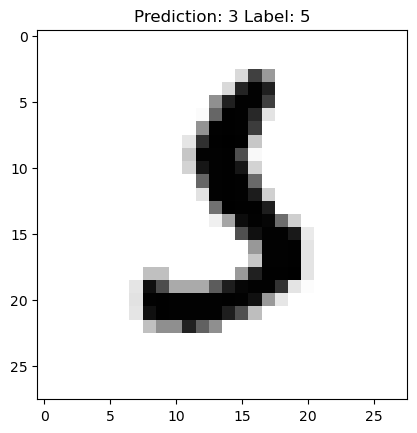

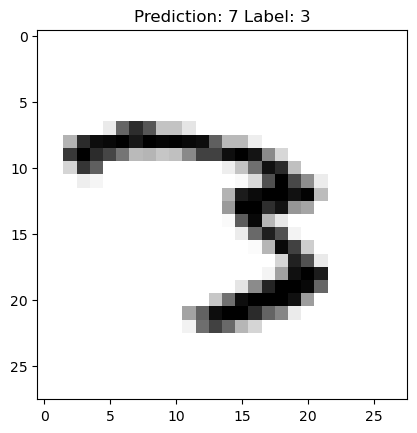

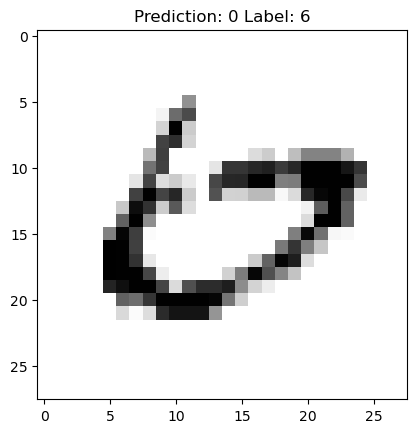

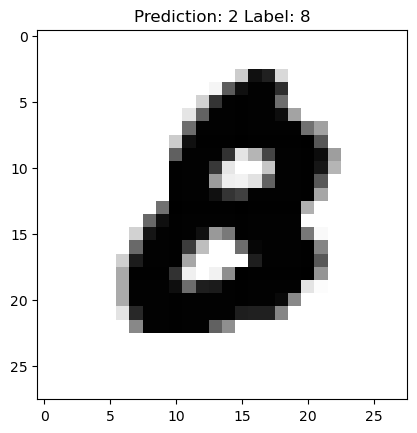

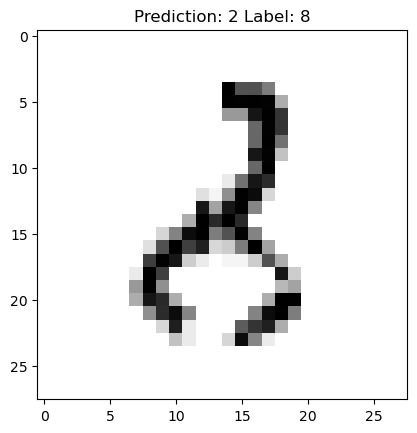

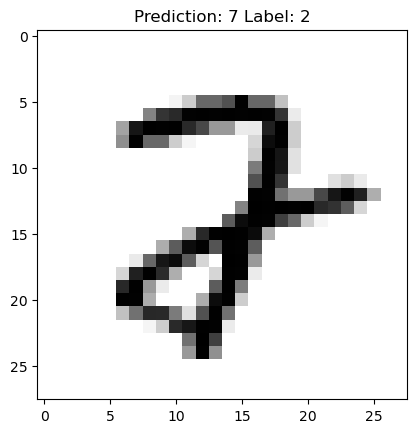

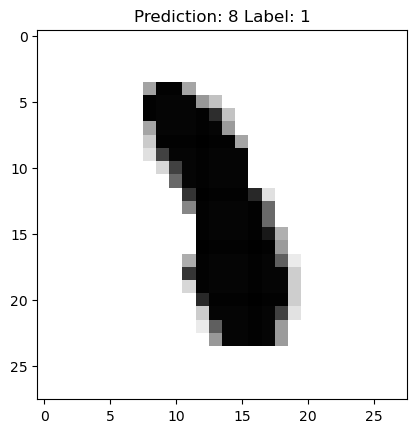

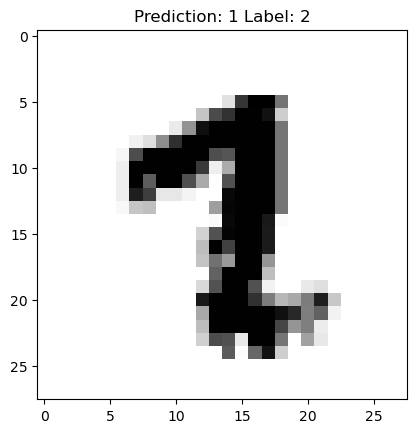

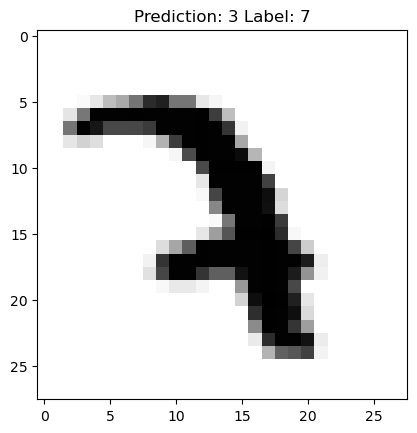

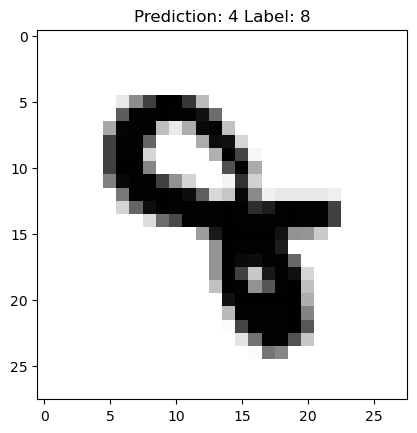

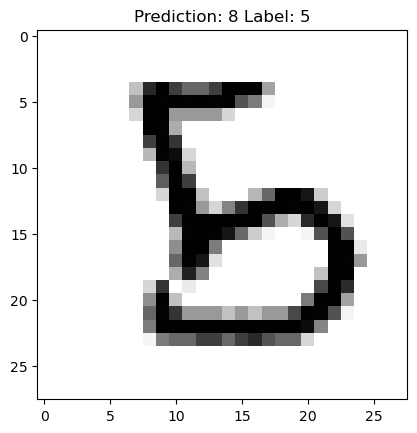

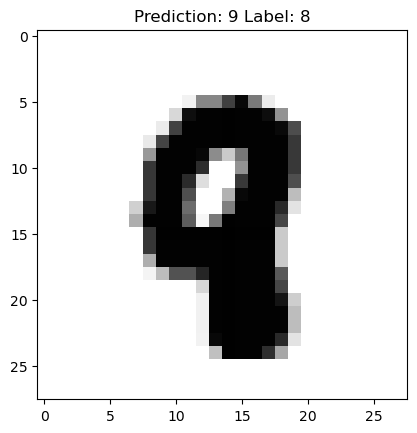

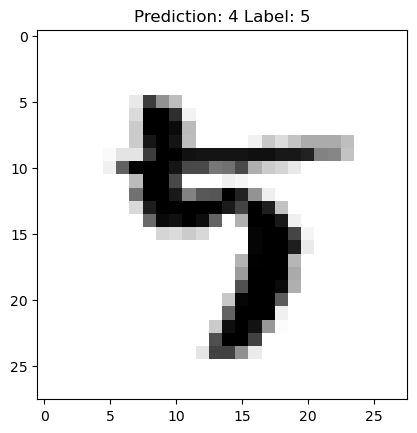

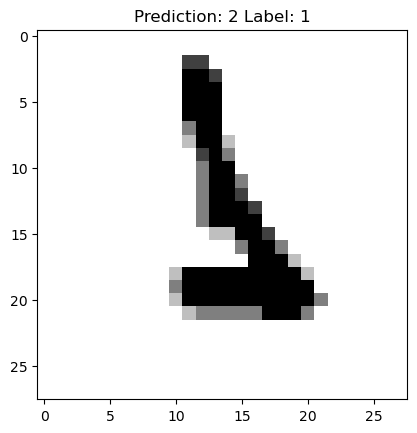

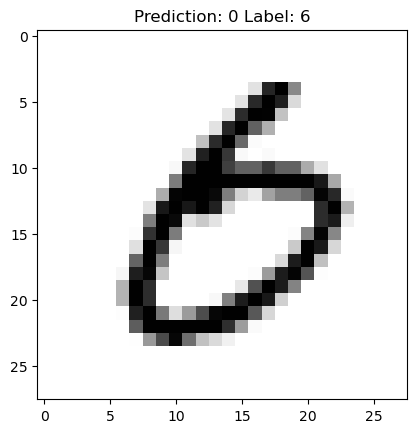

In [14]:
#lets visualize where our NN had challenges and gone wrong
for x in range(1000):
    test_image=test_images[x,:].reshape(1,784)
    predicted_cat=model.predict(test_image,verbose=0).argmax()
    label=test_labels[x].argmax()
    if(predicted_cat != label):
        plt.title('Prediction: %d Label: %d' %(predicted_cat,label))
        plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()